In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

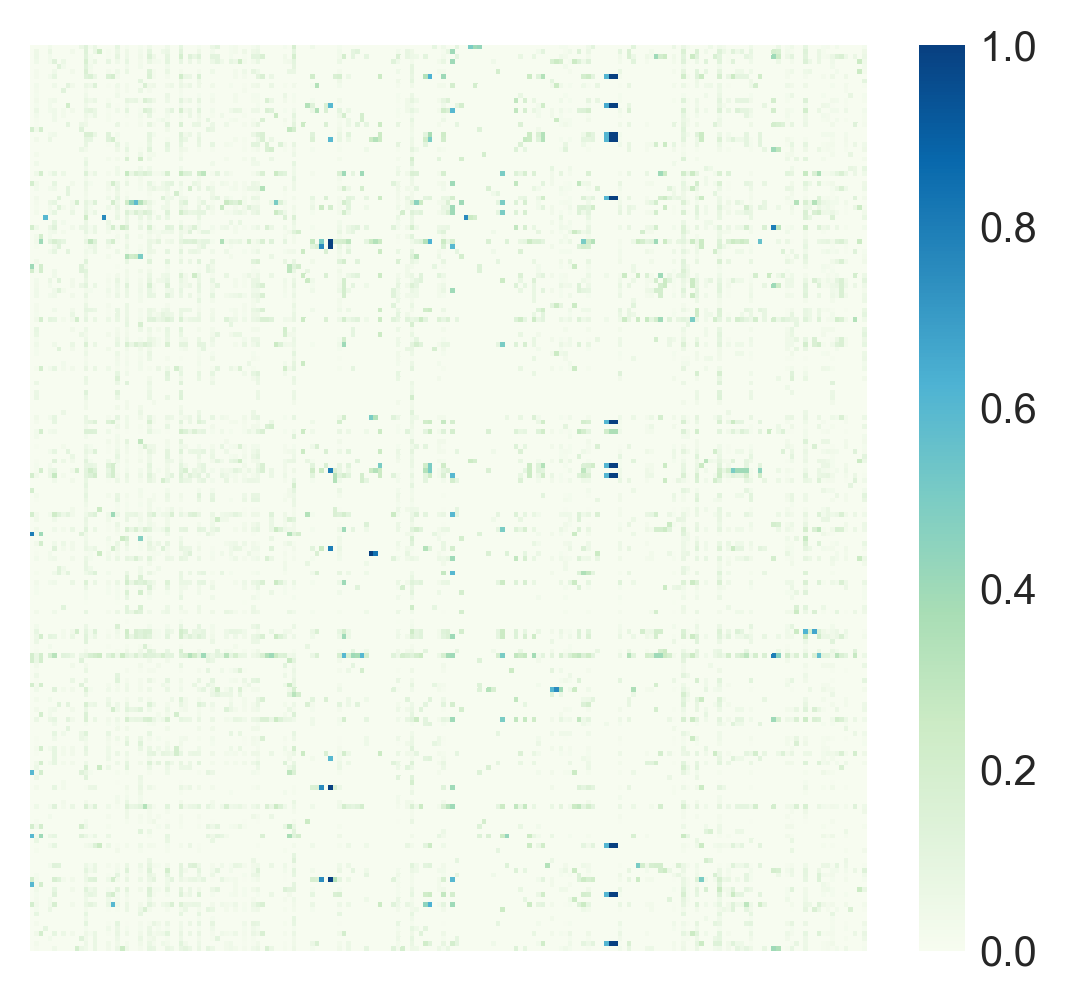

In [2]:
data=pd.read_csv('../results/similarity/KEGG_dorothea_AB_overlap.csv',sep=',',header=0,index_col=0)
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data,cmap='GnBu')
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('../figures/sim_heat_example.pdf')

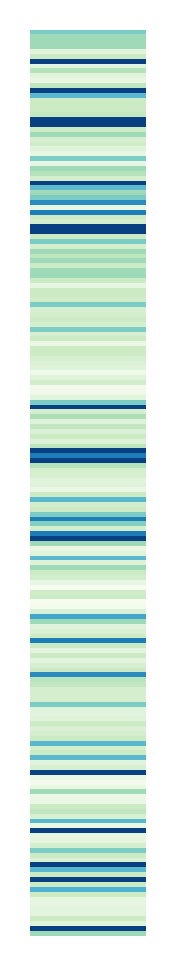

In [3]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.max(1)),cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.legend([])
plt.savefig('../figures/sim_kegg_example.pdf')

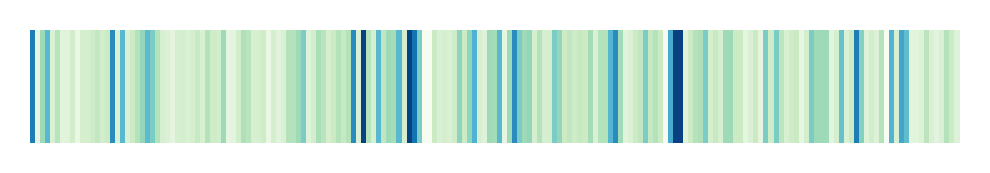

In [4]:
plt.figure(figsize=(4,0.5),dpi=300)
sns.heatmap(pd.DataFrame(data.max(0)).T,cmap='GnBu',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.legend([])
plt.savefig('../figures/sim_dorothea_example.pdf')

In [2]:
data=pd.read_csv('../results/benchmark/datasets/progeny_data.csv',sep=',',header=0,index_col=0)
data[data<-10]=-10
data[data>10]=10

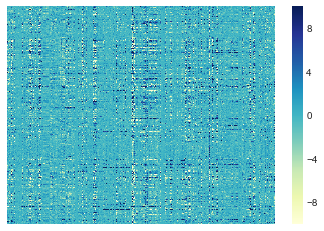

In [7]:
#plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data,cmap='YlGnBu')
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('../figures/gex_heat_example.png',transparent=True)

In [9]:
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)

In [10]:
for i in range(len(list(set(meta['pathway'])))):
    pw=list(set(meta['pathway']))[i]
    indexes=meta.index[meta['pathway']==pw]
    meta.loc[indexes,'pathway']=i

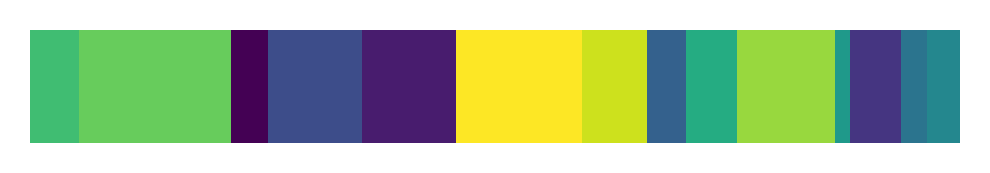

In [21]:
plt.figure(figsize=(4,0.5),dpi=300)
sns.heatmap(meta.T,cmap='viridis',cbar=None)
plt.yticks([])
plt.xticks([])
plt.ylabel('')
plt.xlabel('')
plt.legend([])
plt.savefig('../figures/gex_meta_example.pdf')

In [51]:
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import auc as AUC

In [43]:
data=pd.read_csv('../results/benchmark/scores/progeny/single/dorothea_AB.csv',sep=',',header=0,index_col=0)
meta=pd.read_csv('../results/benchmark/datasets/progeny_meta.csv',sep=',',header=0,index_col=0)
meta.index=pd.Series(meta.index).apply(lambda x:x.replace('-','.')).values
meta.index=pd.Series(meta.index).apply(lambda x:x.replace(' ','.')).values
assert np.sum(meta.index!=data.columns)==0

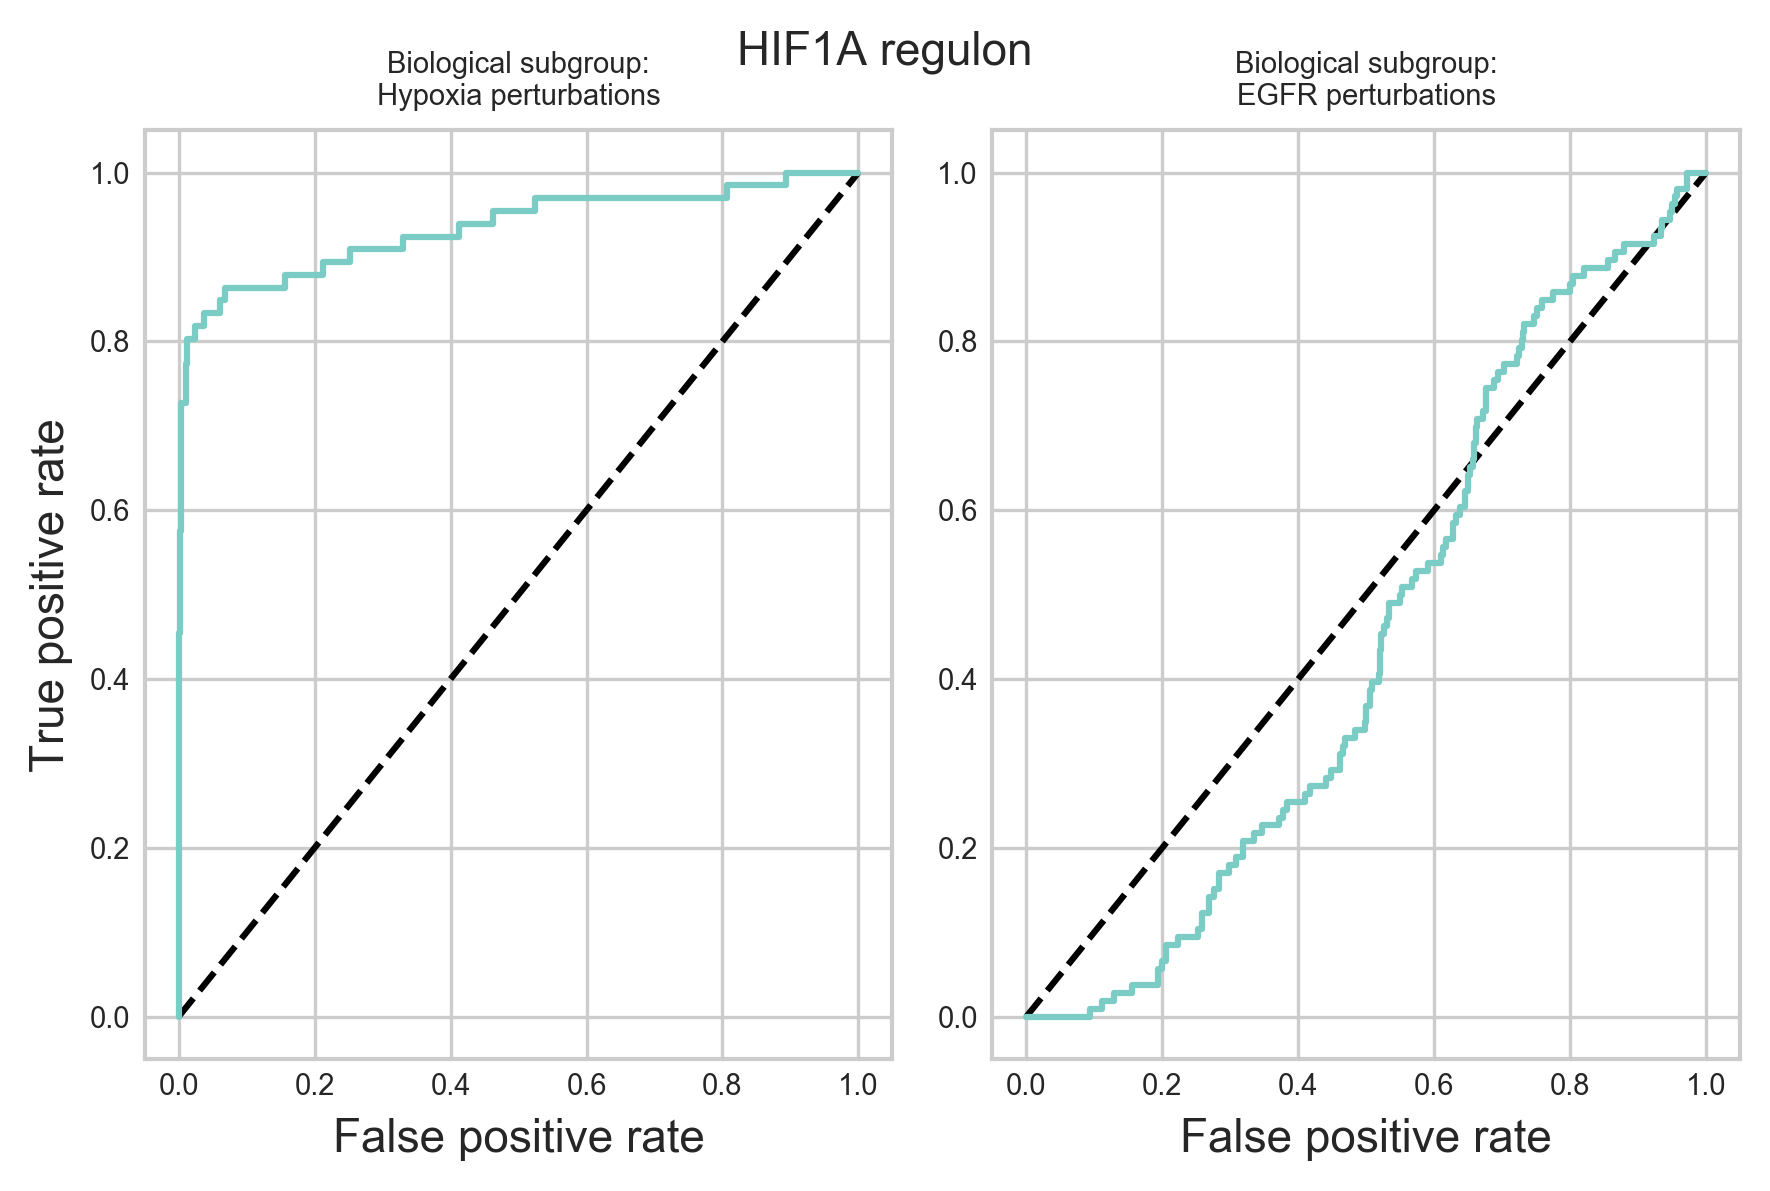

In [98]:
f,axs=plt.subplots(1,2,figsize=(6,4),dpi=300)
sns.set_palette('GnBu',1)

y_tr=(meta['pathway']=='Hypoxia')*1
y_pr=data.loc['HIF1A']
fpr,tpr,dummy=ROC(y_score=y_pr,y_true=y_tr)
axs[0].plot([0,1],[0,1],'k--')
axs[0].plot(fpr,tpr)
axs[0].set_xlabel('False positive rate',size=11)
axs[0].set_ylabel('True positive rate',size=11)
axs[0].tick_params(labelsize=7)
axs[0].set_title('Biological subgroup:\nHypoxia perturbations',size=7)

y_tr=(meta['pathway']=='EGFR')*1
y_pr=data.loc['HIF1A']
fpr,tpr,dummy=ROC(y_score=y_pr,y_true=y_tr)
axs[1].plot([0,1],[0,1],'k--')
axs[1].plot(fpr,tpr)
axs[1].set_xlabel('False positive rate',size=11)
axs[1].tick_params(labelsize=7)
axs[1].set_title('Biological subgroup:\nEGFR perturbations',size=7)

f.suptitle('HIF1A regulon',size=11)
plt.tight_layout()
plt.savefig('../figures/roc_example.pdf')

In [101]:
data=pd.read_csv('../results/benchmark/z_scores/progeny/single/dorothea_AB.csv',sep=',',header=0,index_col=0).T

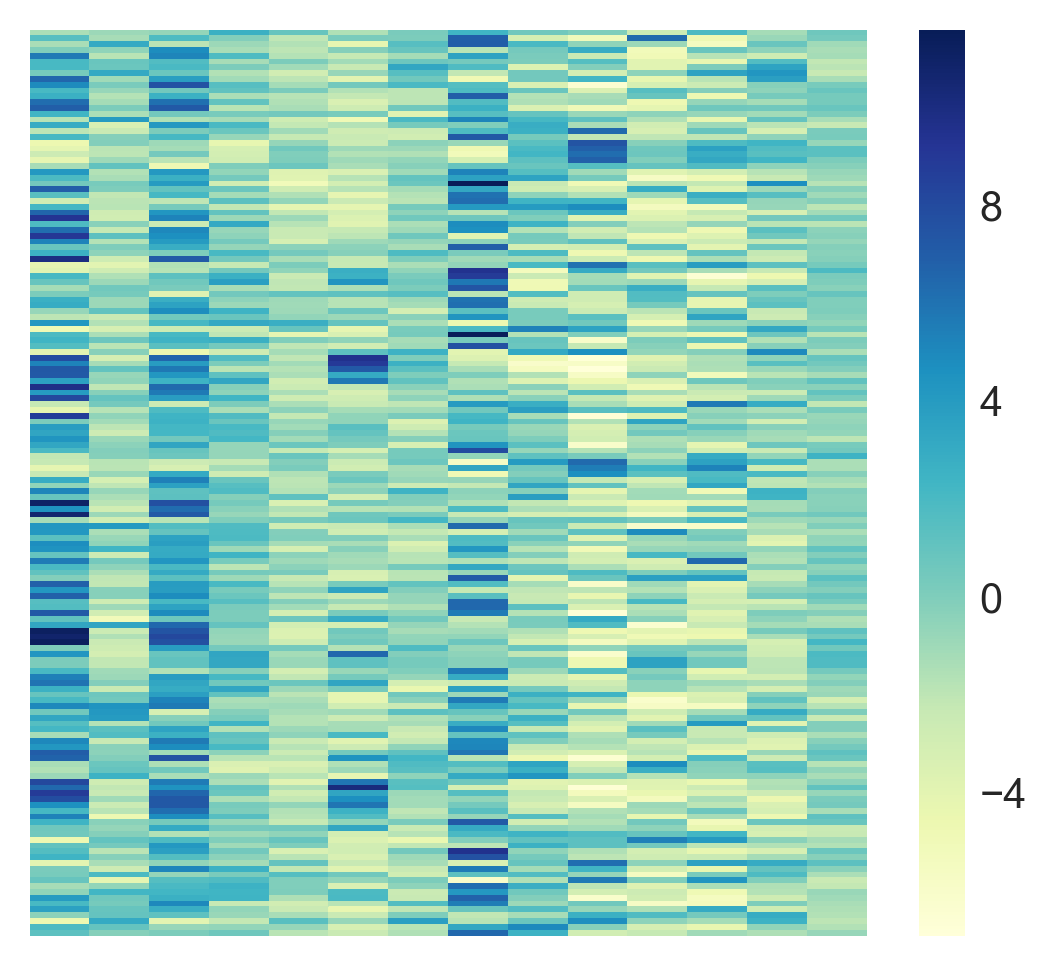

In [107]:
plt.figure(figsize=(4.5,4),dpi=300)
sns.heatmap(data,cmap='YlGnBu')
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('../figures/roc_heat_example.pdf')

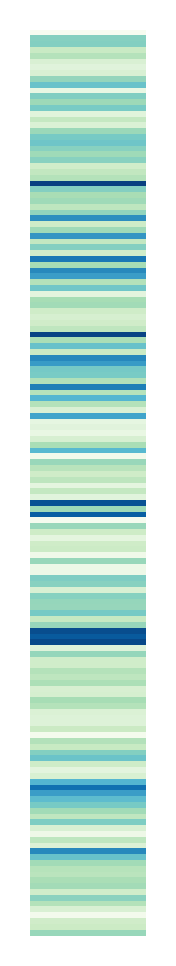

In [112]:
plt.figure(figsize=(0.5,4),dpi=300)
sns.heatmap(pd.DataFrame(data.abs().max(1)),cmap='GnBu',cbar=None)
plt.xticks([])
plt.yticks([])
plt.xlabel('')
plt.ylabel('')
plt.savefig('../figures/roc_max_example.pdf')